In [30]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
from networkx.algorithms.community.quality import modularity
     

In [31]:
G = nx.read_gml('/content/football.gml')
     

In [32]:
for n, d in G.degree():
    print(f"{n:30} | {d:5} |")

Node Name                      | Degree |
--------------------------------------+-------
BrighamYoung                   |    12 |
FloridaState                   |    12 |
Iowa                           |    12 |
KansasState                    |    12 |
NewMexico                      |    11 |
TexasTech                      |    12 |
PennState                      |    12 |
SouthernCalifornia             |    12 |
ArizonaState                   |    11 |
SanDiegoState                  |    11 |
Baylor                         |    10 |
NorthTexas                     |    10 |
NorthernIllinois               |    10 |
Northwestern                   |    11 |
WesternMichigan                |    10 |
Wisconsin                      |    12 |
Wyoming                        |    11 |
Auburn                         |    11 |
Akron                          |    11 |
VirginiaTech                   |    11 |
Alabama                        |    11 |
UCLA                           |    11 |
Arizona  

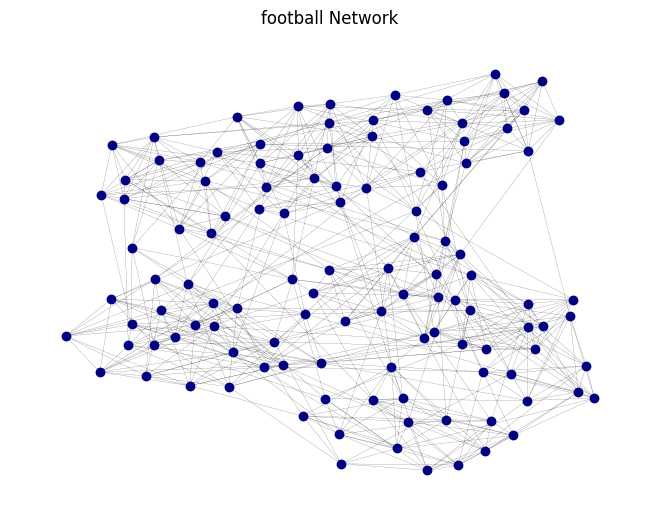

In [33]:
options = {"node_color": "Navy", "node_size": 50, "linewidths": 0, "width": 0.1}
pos = nx.spring_layout(G, seed=1969) # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.title('football Network')
plt.show()

In [34]:
#finding the cliques
list(nx.find_cliques(G))

[['Minnesota', 'Ohio'],
 ['Minnesota', 'Baylor'],
 ['Minnesota', 'OhioState', 'Iowa', 'Illinois', 'PennState'],
 ['Minnesota', 'OhioState', 'Iowa', 'Wisconsin'],
 ['Minnesota', 'OhioState', 'Purdue', 'Wisconsin'],
 ['Minnesota', 'OhioState', 'Purdue', 'PennState'],
 ['Minnesota', 'Indiana', 'PennState', 'Illinois', 'Iowa'],
 ['Minnesota', 'Indiana', 'PennState', 'Purdue'],
 ['Minnesota', 'Indiana', 'Northwestern', 'Iowa', 'Illinois'],
 ['Minnesota', 'Indiana', 'Northwestern', 'Iowa', 'Wisconsin'],
 ['Minnesota', 'Indiana', 'Northwestern', 'Purdue', 'Wisconsin'],
 ['Minnesota', 'LouisianaMonroe'],
 ['Duke',
  'WakeForest',
  'FloridaState',
  'NorthCarolina',
  'Maryland',
  'NorthCarolinaState',
  'GeorgiaTech',
  'Virginia',
  'Clemson'],
 ['Duke', 'WakeForest', 'Vanderbilt'],
 ['Duke', 'Northwestern'],
 ['Duke', 'EastCarolina'],
 ['Baylor', 'TexasTech', 'Oklahoma', 'Nebraska'],
 ['Baylor', 'TexasTech', 'Oklahoma', 'TexasA&M', 'OklahomaState', 'Texas'],
 ['Baylor', 'TexasTech', 'North

In [35]:
def cpm_algorithm(graph, k):
    # Step 1: Find all k-cliques
    cliques = list(nx.enumerate_all_cliques(graph))
    k_cliques = [clique for clique in cliques if len(clique) >= k]

    # Step 2: Build a clique graph
    clique_graph = nx.Graph()
    for i, clique1 in enumerate(k_cliques):
        clique_graph.add_node(i)
        for j, clique2 in enumerate(k_cliques[i + 1:]):
            intersection = set(clique1) & set(clique2)
            if len(intersection) == k - 1:
                clique_graph.add_edge(i, i + j + 1)

    # Step 3: Find the overlapping communities
    communities = list(nx.connected_components(clique_graph))

    # Step 4: Post-process the communities
    final_communities = []
    for community in communities:
        node_set = set()
        for c in community:
            node_set.update(k_cliques[c])
        final_communities.append(node_set)

    return final_communities

# Set the parameter k
k = 4

# Apply the CPM algorithm
result = cpm_algorithm(G, k)

# Print the detected communities
for i, community in enumerate(result):
    print(f"Community {i+1}: {community}")

Community 1: {'BrighamYoung', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'Utah', 'ColoradoState', 'SanDiegoState', 'Wyoming', 'AirForce'}
Community 2: {'FloridaState', 'NorthCarolina', 'Maryland', 'Duke', 'Virginia', 'WakeForest', 'GeorgiaTech', 'Clemson', 'NorthCarolinaState'}
Community 3: {'TexasTech', 'IowaState', 'Nebraska', 'OklahomaState', 'Baylor', 'Colorado', 'Missouri', 'TexasA&M', 'Texas', 'Kansas', 'Oklahoma', 'Iowa', 'KansasState'}
Community 4: {'Minnesota', 'Wisconsin', 'Purdue', 'OhioState', 'MichiganState', 'Indiana', 'Northwestern', 'Illinois', 'Iowa', 'PennState', 'Michigan'}
Community 5: {'California', 'ArizonaState', 'Arizona', 'Stanford', 'Idaho', 'Washington', 'SouthernCalifornia', 'Oregon', 'UCLA', 'OregonState', 'WashingtonState'}
Community 6: {'NorthTexas', 'NewMexicoState', 'ArkansasState', 'UtahState', 'Idaho', 'BoiseState'}
Community 7: {'BallState', 'NorthernIllinois', 'EasternMichigan', 'CentralMichigan', 'WesternMichigan', 'Toledo'}
Community 8: {'Ohio', 'Ma

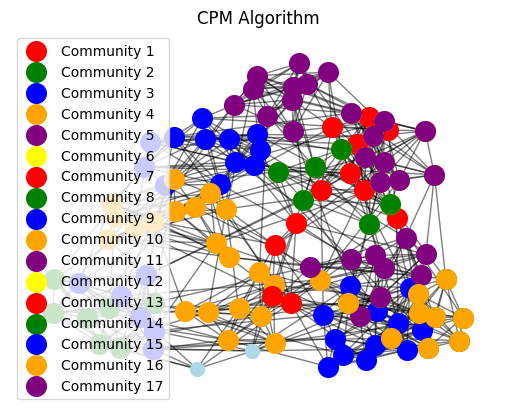

In [37]:
# Visualize the communities
pos = nx.spring_layout(G)  # Layout for the visualization

# Draw nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw each community with a different color
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
for i, community in enumerate(result):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)], node_size=200, label=f'Community {i+1}')

# Set plot options
plt.title('CPM Algorithm')
plt.legend()
plt.axis('off')
plt.show()